In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8),
                     'font.size': 22})

def increase_linewidth(ax):
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    if len(lines) > 1:
        leg = ax.legend()
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=5)

In [3]:
model_directory = "models/answer_questions/"
data_directory = "answer_questions_plots/"

In [4]:
stats = pd.read_hdf(data_directory+"training_data.h5", "training_data")

In [5]:
stats["Episode"] = stats.index

In [27]:
stats.head()

,control,correct_answer,episode_length,question_loss,value_loss,seed,Episode,zero_control,one_ball,two_ball,none,two_balls
0,0,True,613,0,"tensor(0.0426, device='cuda:0')",0,0,True,False,False,True,False
1,1,False,603,0,"tensor(0.0469, device='cuda:0')",0,1,False,True,False,False,False
2,1,False,605,0,"tensor(0.0484, device='cuda:0')",0,2,False,True,False,False,False
3,0,False,607,0,"tensor(0.0482, device='cuda:0')",0,3,True,False,False,True,False
4,0,False,601,0,"tensor(0.0477, device='cuda:0')",0,4,True,False,False,True,False


In [32]:
np.corrcoef(stats.control, stats.correct_answer)

array([[1.        , 0.00595567],
       [0.00595567, 1.        ]])

In [20]:
stats["none"] = (stats.control == 0)
stats["one_ball"] = (stats.control == 1)
stats["two_balls"] = (stats.control == 2)

In [8]:
WINDOW_SIZE = 100

In [21]:
columns = ["none", "one_ball", "two_balls", "episode_length", "value_loss", "correct_answer"]
rolling_stats = []

for seed, df in stats.groupby("seed"):
    rolling_df = pd.DataFrame(columns=columns)
    for column in columns:
        rolling_df[column] = df[column].rolling(window=WINDOW_SIZE).mean()
    # rolling_df.control.plot()
    """plt.show()
    rolling_df.value_loss.plot()
    plt.show()
    rolling_df.episode_length.plot()
    plt.show()"""
    rolling_stats.append(rolling_df)
rolling_stats = pd.concat(rolling_stats)

In [10]:
rolling_stats["Episode"] = rolling_stats.index

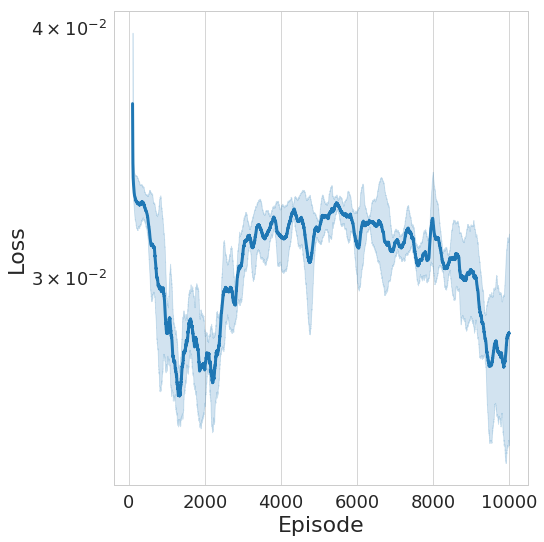

In [11]:
ax = sns.lineplot(x="Episode", y="value_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd")
ax.set_yscale("log")
plt.ylabel("Loss")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"loss.pdf")

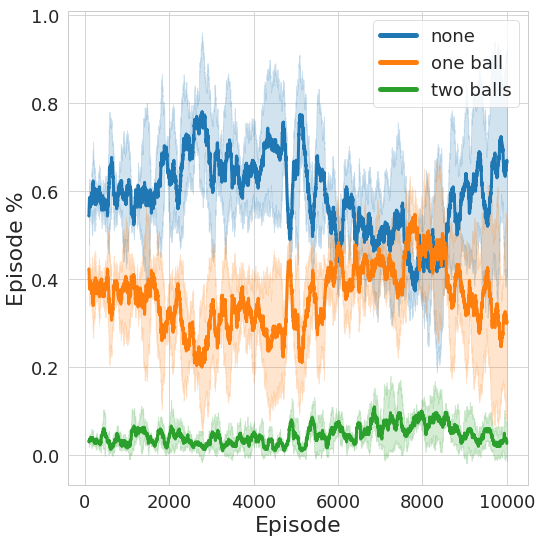

In [26]:
rolling_stats["Episode"] = rolling_stats.index
ax = sns.lineplot(x="Episode", y="none", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="none")
ax = sns.lineplot(x="Episode", y="one_ball", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="one ball")
ax = sns.lineplot(x="Episode", y="two_balls", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="two balls")

increase_linewidth(ax)
plt.ylabel("Episode %")
plt.tight_layout()
plt.savefig(data_directory+"control.pdf")

In [34]:
stats.one_ball.mean(), stats.two_balls.mean()

(0.36013333333333336, 0.04563333333333333)

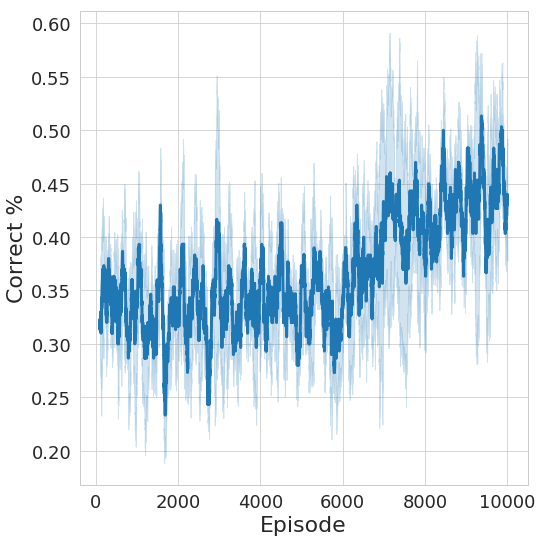

In [13]:
ax = sns.lineplot(x="Episode", y="correct_answer", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Correct %")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"correct.pdf")

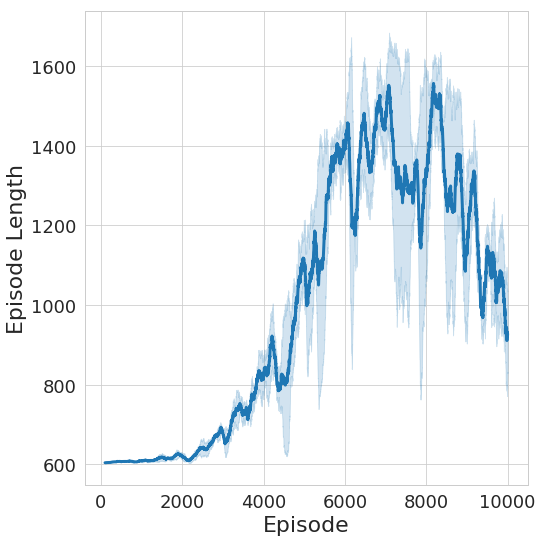

In [14]:
ax = sns.lineplot(x="Episode", y="episode_length", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Episode Length")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"episode_length.pdf")

# Validation data

stats = pd.read_hdf(data_directory+"validation_data.h5", "validation_data")

stats

stats.episode = stats.episode.astype(int)
stats.seed = stats.seed.astype(int)

# plt.xticks(ticks=np.arange(0, 35000, 5000), labels=np.arange(0, 35000, 5000))
ax = sns.lineplot(x="episode", y="avg_control", data=stats, linewidth=3)
plt.ylabel("Control %")
plt.xlabel("Episode")
increase_linewidth(ax)
plt.savefig(data_directory+"validation_control.pdf")

stats.sort_values(by="avg_control", ascending=False).iloc[0]

plt.xticks(ticks=np.arange(0, 35000, 5000), labels=np.arange(0, 35000, 5000))
ax = sns.lineplot(x="episode", y="avg_episode_length", data=stats, linewidth=3)
plt.ylabel("Avg Episode length")
plt.xlabel("Episode")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"validation_ep_length.pdf")